## Question 1

In [1]:
import sys
assert sys.version_info >= (3,7)

import numpy as np
import cv2 as cv
from util_func import *

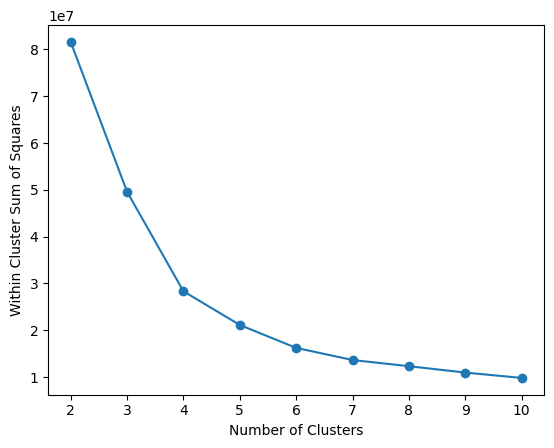

In [7]:
img = cv.imread("zebra.jfif")
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
rgb = rgb.reshape((-1, 3))

clust_list = []
clust_range = range(2,11)
Z = np.float32(rgb)

for k in clust_range:
    criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret, label, center = cv.kmeans(Z, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    clust_list.append(ret)
    
plt.plot(clust_range, clust_list, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()


In [8]:
def k_means_clust(img, K, max_iter=10, eps=1.0, attempts=10, flag=cv.KMEANS_PP_CENTERS):

    img = img.reshape((-1, 3))
    img = np.float32(img)
    criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_MAX_ITER, max_iter, eps) # 10 max iter, 1.0 eps
    return cv.kmeans(img, K, None, criteria, attempts, flag)

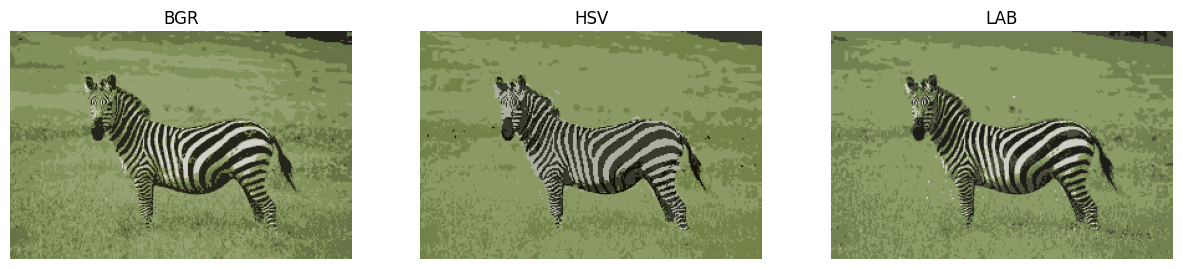

In [15]:
K = 5

# BGR
ret, label, center, = k_means_clust(img, K)

center = np.uint8(center)
res = center[label.flatten()]
quant_bgr = res.reshape(img.shape)
quant_bgr = cv.cvtColor(quant_bgr, cv.COLOR_BGR2RGB)

# HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

ret, label, center, = k_means_clust(hsv, K)
center = np.uint8(center)
res = center[label.flatten()]
quant_hsv = res.reshape(hsv.shape)
quant_hsv = cv.cvtColor(quant_hsv, cv.COLOR_HSV2RGB)

# LAB
lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)

ret, label, center, = k_means_clust(lab, K)
center = np.uint8(center)
res = center[label.flatten()]
quant_lab = res.reshape(lab.shape)
quant_lab = cv.cvtColor(quant_lab, cv.COLOR_LAB2RGB)

plt.figure(figsize=(15,4))
plt.subplot(131), plt.imshow(quant_bgr), plt.title("BGR"), plt.axis('off')
plt.subplot(132), plt.imshow(quant_hsv), plt.title("HSV"), plt.axis('off')

plt.subplot(133), plt.imshow(quant_lab), plt.title("LAB"), plt.axis('off')

plt.show()

- BGR -> the detail of the zebra is clearest among the three, but have much surrounding noise
- HSV -> suppressing surrounding noises, but lines on the zebra become blurry and have detail lost
- LAB -> clearer than HSV, but still have some color lost compared to BGR